<a href="https://colab.research.google.com/github/PedroJuiz/SupervisedLearning/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S3: Detección del cáncer

## Objetivos

Los objetivos de este challenge es hacer un modelo capaz de detectar el cáncer.

## Configuración del entorno

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import scikitplot as skplt

## Dataset

En este caso vamos a utilizar un dataset real de análisis de cáncer de mama del Breast Cancer Center de Wisconsin. Este dataset está disponible en `sklearn` así que cargarlo es tan fácil como:

In [ ]:
from sklearn import datasets
dataset = sklearn.datasets.load_breast_cancer()

Como siempre, una vez cargado debemos inspeccionar y comprender el dataset:

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Como se indica en la descripción del dataset, éste consta de 569 instancias con 30 atributos numéricos cada uno.

In [ ]:
dataset_X = dataset.data

In [ ]:
dataset_X.shape

(569, 30)

In [ ]:
dataset_X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

Este dataset clasifica los casos en cáncer maligno ($0$) o benigno ($1$).

In [ ]:
print(dataset.target_names)

['malignant' 'benign']


In [ ]:
dataset_y = dataset.target

In [ ]:
dataset_y.shape

(569,)

In [ ]:
print(dataset_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## ¿Este dataset está balanceado o desbalanceado?

In [ ]:
np.bincount(dataset_y)

array([212, 357], dtype=int64)

In [ ]:
pd.Series(dataset_y).value_counts()

1    357
0    212
dtype: int64

In [ ]:
np.bincount(dataset_y)/len(dataset_y)

array([0.37258348, 0.62741652])

Observamos que tenemos 357 instancias (62,7%) de la clase 1 y 212 (37,2%) de la clase 0, por lo tanto, podemos decir que el dataset esta ligeramente desbalanceado.

## ¿Cual sería el clasificador más sencillo con mejor % de acierto que se te ocurre? ¿es útil en la práctica?

Se podría probar con el clasificador KNN

## Entrena un modelo y evalúa su rendimiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.3, random_state=123)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_hat = knn.predict(X_test)

Procedemos a evaluar el modelo:

In [ ]:
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

0.9298245614035088


In [ ]:
classification_report = classification_report(y_test, y_hat)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        68
           1       0.92      0.97      0.94       103

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



## Dibuja la matriz de confusión

In [ ]:
confusion_matrix(y_test, y_hat)

array([[ 59,   9],
       [  3, 100]], dtype=int64)

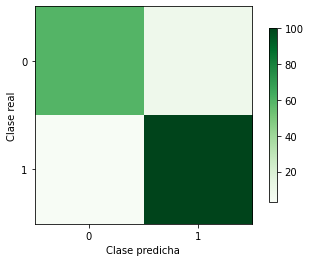

In [ ]:
plt.imshow(confusion_matrix(y_test, y_hat), cmap="Greens")
plt.colorbar(shrink=0.8)
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real");

## Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)?

In [ ]:
matrix = np.array([[59, 9], [3, 100]])
VP = matrix[1,1]
FN = matrix[1,0]

prob = VP / (VP + FN)
print(f'La probabilidad de que el modelo clasifique a un paciente con cáncer benigno como cáncer benigno es de : {prob}')

La probabilidad de que el modelo clasifique a un paciente con cáncer benigno como cáncer benigno es de : 0.970873786407767


## Si tengo un paciente con un cáncer maligno (0), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer benigno (1)?

In [ ]:
VN = matrix[0,0]
FP = matrix[0,1]

prob = FP / (FP + VN)
print(f'La probabilidad de que el modelo clasifique a un paciente con cáncer maligno como cáncer benigno es de : {prob}')

La probabilidad de que el modelo clasifique a un paciente con cáncer maligno como cáncer benigno es de : 0.1323529411764706


## Si tengo un paciente con un cáncer benigno (1), ¿qué probabilidad hay de que el modelo lo clasifique como cáncer maligno (0)?

In [ ]:
FN = matrix[1,0]
VP = matrix[1,1]
prob = FN / (FN + VP)
print(f'La probabilidad de que el modelo clasifique a un paciente con cáncer benigno como cáncer maligno es de : {prob}')

La probabilidad de que el modelo clasifique a un paciente con cáncer benigno como cáncer maligno es de : 0.02912621359223301


## ¿Qué podrías concluir del clasificador?

Considero que en terminos generales ofrece unos buenos resultados, aunque en este caso, tratándose de temas de salud, podrían ser mejores en ciertos aspectos, por ejemplo en la probabilidad de que alguien con cáncer maligno lo clasifique como benigno, dado que es recomendable empezar el tratramiento cuanto antes para tener más opciones de curarse.
Se observa también que el clasificador detecta mejor los pacientes con cáncer benigno, una de las razones posiblemente sea que en los datos de train haya obtenido más casos en los que el paciente presenta un tumor benigno, lo cual es probable dado que existe cierto desbalanceo en el dataset como previamente hemos comentado.